# Using Data Science to prevent delays on your flights

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
%matplotlib inline


In [91]:
df = pd.read_csv(r'C:\Users\Larissa\Downloads\data_test.csv',encoding='latin-1')

df.head()

,aircraft_tail,check_c_in_lst_yr,aircraft_years,aircraft_msn,fault_source,deferral_reference,deferral_class,logbook_type,event_type,event_status,...,moc,maintenance_airline_code,maintenance_airline_code_group,fleet,fleet_type,fleet_holding,condicion_mapi,type,type_latam,fault_count
0,PR-MBW,no,11,3710,CABIN,35-30-01A,MEL C,MAINT,CF,CFCERT,...,NaN,A319JJ,A320JJ,A320FAM,NB,BR,LIMPIO,NO TECH,NO TECH,-
1,PT-MZZ,no,19,1593,PILOT,46-21-01A,MEL C,CABIN,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,FAULT
2,PT-MXL,no,6,5947,PILOT,21-00-04A,MEL C,MAINT,CF,CFCERT,...,NaN,A321JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,FAULT
3,PR-MBO,yes,13,3156,PILOT,33-40-01B,MEL C,NaN,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,REPEATED
4,PR-MBZ,no,18,1827,PILOT,36-12-02B,MEL C,MAINT,CF,CFCERT,...,NaN,A320JJ,A320JJ,A320FAM,NB,BR,LIMPIO,TECH,TECH,REPEATED


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   aircraft_tail                   15937 non-null  object 
 1   check_c_in_lst_yr               15937 non-null  object 
 2   aircraft_years                  15937 non-null  int64  
 3   aircraft_msn                    15937 non-null  int64  
 4   fault_source                    15937 non-null  object 
 5   deferral_reference              15933 non-null  object 
 6   deferral_class                  15937 non-null  object 
 7   logbook_type                    13426 non-null  object 
 8   event_type                      15937 non-null  object 
 9   event_status                    15937 non-null  object 
 10  fault_name                      15937 non-null  object 
 11  description                     15351 non-null  object 
 12  barcode                         

# #Step 3: Data Cleaning

In [93]:
df=df.drop(['aircraft_msn','deferral_reference','event_type','found_during_flight','aircraft_assembly','ata_4d','ata_6d','config_slot_details','maintenance_airline_code','maintenance_airline_code_group','fleet_type','fleet_holding','type','type_latam','moc'],axis=1)

df.head()

,aircraft_tail,check_c_in_lst_yr,aircraft_years,fault_source,deferral_class,logbook_type,event_status,fault_name,description,barcode,task_status,flight_arrival_airport,ata_2d,config_slot_name,fleet,condicion_mapi,fault_count
0,PR-MBW,no,11,CABIN,MEL C,MAINT,CFCERT,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,501173-B-047 REF ITEM RTC BA 652698 - UTILIZAD...,T00F8Y6K,COMPLETE,CNF,35,PORTABLE OXYGEN,A320FAM,LIMPIO,-
1,PT-MZZ,no,19,PILOT,MEL C,CABIN,CFCERT,500928-A-037 HORARIO PUSHBACK ACARS INCORRETO ...,HORARIO PUSHBACK ACARS INCORRETO + 5MINUTOS,T00F8Y94,COMPLETE,FLN,46,AIR TRAFFIC INFORMATION MANAGMENT SYSTEM (A.T....,A320FAM,LIMPIO,FAULT
2,PT-MXL,no,6,PILOT,MEL C,MAINT,CFCERT,500995-A-029 MAINTENANCE TEMP CTL 1 AND 2,MAINTENANCE TEMP CTL 1 AND 2 \r\nPERFORMED B...,T00F93J0,COMPLETE,BSB,21,PACK TEMPERATURE CONTROL,A320FAM,LIMPIO,FAULT
3,PR-MBO,yes,13,PILOT,MEL C,NaN,CFCERT,MLB 501345-A-004 NAV TAIL LIGHT 1 INOP,NAV TAIL LIGHT 1 INOP,T00F9E5G,COMPLETE,GIG,33,NAVIGATION LIGHTS,A320FAM,LIMPIO,REPEATED
4,PR-MBZ,no,18,PILOT,MEL C,MAINT,CFCERT,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,AIR APU BLEED FAULT STUKED IN OPEN POSITION ON...,T00F9KH4,COMPLETE,GRU,49,BLEED AND SURGE AIR,A320FAM,LIMPIO,REPEATED


# Here we are going to the aircraft with the most open faults in 2019

In [64]:
dff = df.groupby(['aircraft_tail']).count()['barcode']
dff

aircraft_tail
PR-MAG    126
PR-MAK    157
PR-MAL     98
PR-MAM    129
PR-MAN    139
         ... 
PT-XPL    105
PT-XPM    106
PT-XPN     84
PT-XPO     86
PT-XPQ     79
Name: barcode, Length: 161, dtype: int64

In [77]:
dff = df.groupby('aircraft_tail') \
       .agg({'barcode':'count', 'aircraft_years':'mean'}) \
       .rename(columns={'barcode':'count','aircraft_years':'acft_age'}) \
       .reset_index()
dfs = dff.sort_values('acft_age', ascending = False)
dfs

,aircraft_tail,count,acft_age
130,PT-MZJ,1,20
129,PT-MZI,107,20
128,PT-MZH,121,20
127,PT-MZG,154,20
136,PT-MZZ,137,19
...,...,...,...
71,PR-TYT,21,0
73,PR-TYV,2,0
72,PR-TYU,4,0
70,PR-TYS,20,0


Text(0.5, 1.0, 'Aircraft Age in Years')

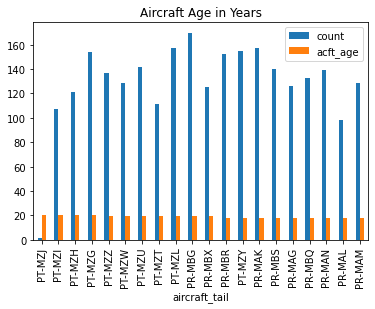

In [78]:
dfs[:20].plot(kind='bar', x='aircraft_tail')
plt.title('Aircraft Age in Years')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EAA7A8AC0>,
      dtype=object)

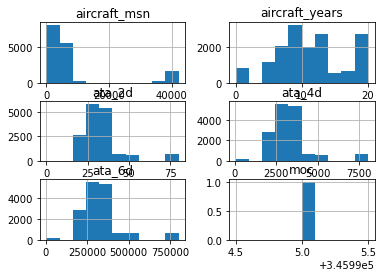

In [31]:
df.hist()

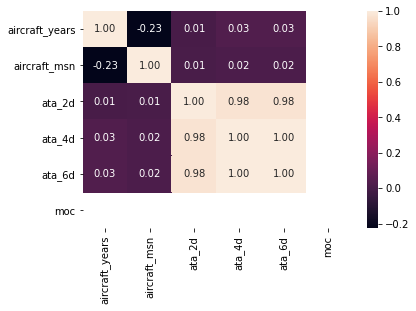

In [32]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [55]:
df.columns

Index(['aircraft_tail', 'aircraft_years', 'aircraft_msn', 'fault_source',
       'deferral_reference', 'deferral_class', 'logbook_type', 'event_type',
       'event_status', 'fault_name', 'description', 'barcode', 'task_status',
       'found_during_flight', 'flight_arrival_airport', 'aircraft_assembly',
       'ata_2d', 'ata_4d', 'ata_6d', 'config_slot_name', 'config_slot_details',
       'moc', 'maintenance_airline_code', 'maintenance_airline_code_group',
       'fleet', 'fleet_type', 'fleet_holding', 'condicion_mapi', 'type',
       'type_latam', 'fault_count'],
      dtype='object')